# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

## Segmentação por Watershed

### Download das imagens de teste

### Imports

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Code

In [6]:
img1 = cv.imread('drive/MyDrive/Colab Notebooks/College/Signal-Image-Processing/image_dataset_publico/moedas_watershed.jpg')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)

In [9]:
# transformar a imagem em preto/branco (binarizar)
img2 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
th, img2 = cv.threshold(img2, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# morfologia matemática

# operacao de abertura = remove pequenos ruidos da imagem
kernel = np.ones((3, 3), np.uint8)  # matriz 3x3 preenchida com o valor 1 (um)
img3 = cv.morphologyEx(img2, cv.MORPH_OPEN, kernel, iterations = 2)

# operacao de dilatacao = preencher pequenos espacos na imagem
img4 = cv.dilate(img3, kernel, iterations=1)

# transformada da distância

# DIST_L2 = distancia euclidiana
# 5       = vizinhos considerados para o calculo da distancia

img5 = cv.distanceTransform(img4, cv.DIST_L2, 5)
th, img6 = cv.threshold(img5, 0.70 * img5.max(), 255, 0)

# procurar a regiao do watershed
img6 = np.uint8(img6)  # converter a matriz de pixels de inteiros
img7 = cv.subtract(img4, img6)

# rotular os componentes conectados da imagem
ret, rotulos = cv.connectedComponents(img6)
rotulos = rotulos + 1

# marcar a regiao do watershed como o valor zero
rotulos[img7 == 255] = 0    # pixels=255 sao alterados para zero
img8 = cv.watershed(img1, rotulos)
img1[rotulos == -1] = [255, 0, 0]

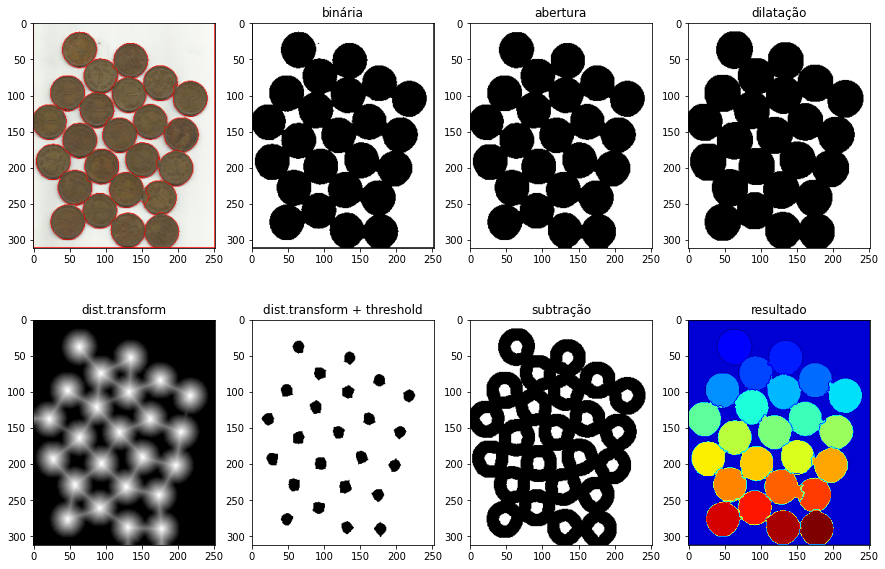

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(241), plt.imshow(img1)
plt.subplot(242), plt.imshow(img2,cmap='binary'), plt.title('binária')
plt.subplot(243), plt.imshow(img3,cmap='binary'), plt.title('abertura')
plt.subplot(244), plt.imshow(img4,cmap='binary'), plt.title('dilatação')
plt.subplot(245), plt.imshow(img5,cmap='gray'), plt.title('dist.transform')
plt.subplot(246), plt.imshow(img6,cmap='binary'), plt.title('dist.transform + threshold')
plt.subplot(247), plt.imshow(img7,cmap='binary'), plt.title('subtração')
plt.subplot(248), plt.imshow(img8,cmap='jet'), plt.title('resultado')
plt.show()

### Exercises

#### Imports

#### Code